## 1. Load Dataset

In [58]:
from  matplotlib import pyplot as plt
%matplotlib inline
from nuscenes.nuscenes import NuScenes
import cv2

rootpath='/data/sets/nuscenes'

nusc = NuScenes(version='v1.0-mini', dataroot=rootpath, verbose=True)


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.393 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


## 2. Get Camera Data

**Scene List**

In [59]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

**Annotated keyframe token**

In [60]:
my_scene = nusc.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
nusc.list_sample(my_sample['token'])

Sample: ca9a282c9e77460f8360f564131a8af5

sample_data_token: 37091c75b9704e0daa829ba56dfa0906, mod: radar, channel: RADAR_FRONT
sample_data_token: 11946c1461d14016a322916157da3c7d, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 491209956ee3435a9ec173dad3aaf58b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 312aa38d0e3e4f01b3124c523e6f9776, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 07b30d5eb6104e79be58eadf94382bc1, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 9d9bf11fb0e144c8b446d54a8a00184f, mod: lidar, channel: LIDAR_TOP
sample_data_token: e3d495d4ac534d54b321f50006683844, mod: camera, channel: CAM_FRONT
sample_data_token: aac7867ebf4f446395d29fbd60b63b3b, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 79dbb4460a6b40f49f9c150cb118247e, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 03bea5763f0f4722933508d5999c5fd8, mod: camera, channel: CAM_BACK
sample_data_token: 43893a033f9c46d4a51b5e08a67a1eb7, mod: camera, channel:

**Four Camera Data**

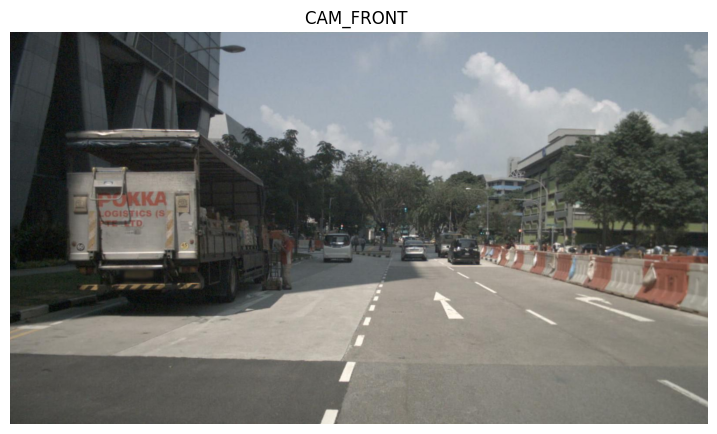

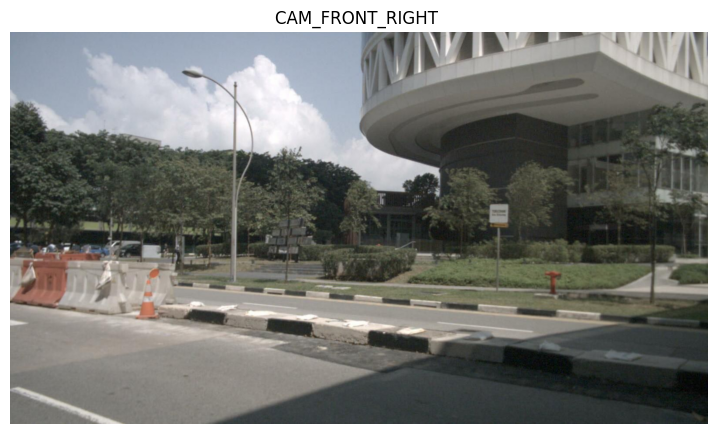

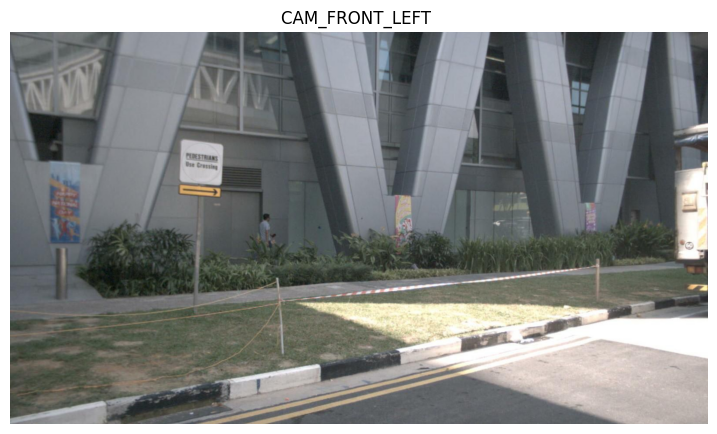

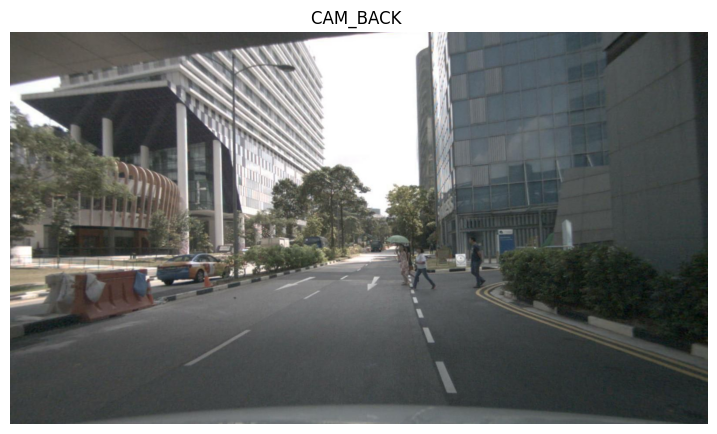

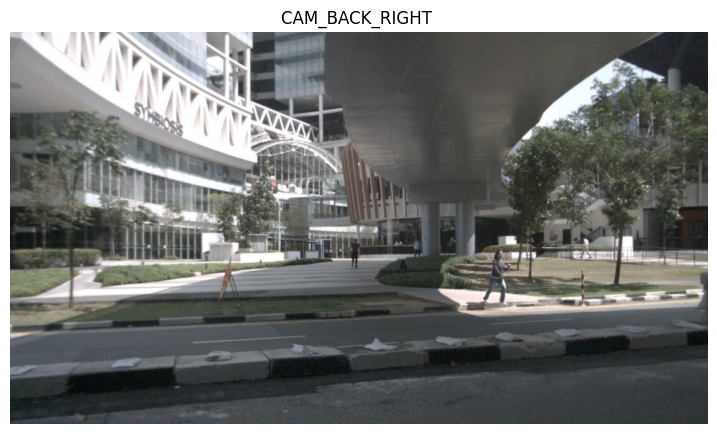

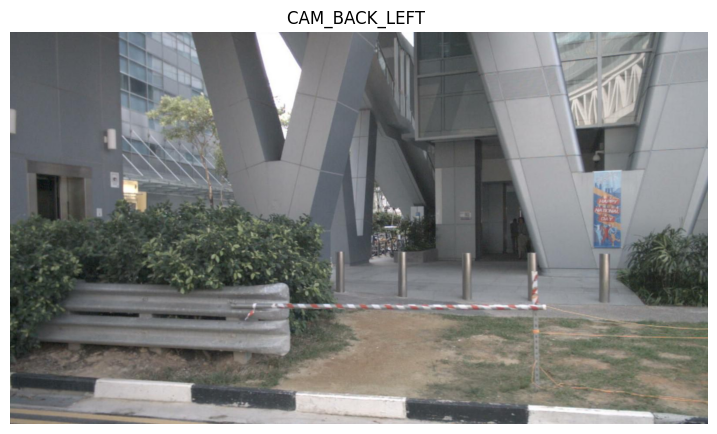

In [61]:
my_sample['data']

cam_front_data = nusc.get('sample_data', my_sample['data']['CAM_FRONT'])
img_front = cv2.imread(rootpath+'/'+cam_front_data['filename'])
nusc.render_sample_data(cam_front_data['token'], False)

cam_front_right_data = nusc.get('sample_data', my_sample['data']['CAM_FRONT_RIGHT'])
img_front_right = cv2.imread(rootpath+'/'+cam_front_right_data['filename'])
nusc.render_sample_data(cam_front_right_data['token'], False)

cam_front_left_data = nusc.get('sample_data', my_sample['data']['CAM_FRONT_LEFT'])
img_front_left = cv2.imread(rootpath+'/'+cam_front_left_data['filename'])
nusc.render_sample_data(cam_front_left_data['token'], False)

cam_back_data = nusc.get('sample_data', my_sample['data']['CAM_BACK'])
img_back = cv2.imread(rootpath+'/'+cam_back_data['filename'])
nusc.render_sample_data(cam_back_data['token'], False)

cam_back_right_data = nusc.get('sample_data', my_sample['data']['CAM_BACK_RIGHT'])
img_back_right = cv2.imread(rootpath+'/'+cam_back_right_data['filename'])
nusc.render_sample_data(cam_back_right_data['token'], False)

cam_back_left_data = nusc.get('sample_data', my_sample['data']['CAM_BACK_LEFT'])
img_back_left = cv2.imread(rootpath+'/'+cam_back_left_data['filename'])
nusc.render_sample_data(cam_back_left_data['token'], False)

## 3. Process image

**Extract feature points in image**

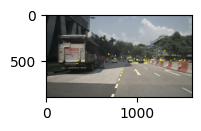

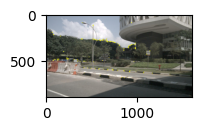

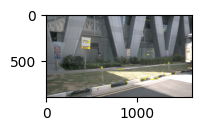

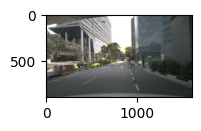

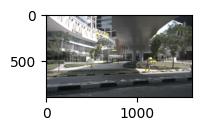

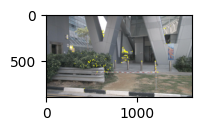

In [62]:
# ORB
orb = cv2.ORB_create(nfeatures=500, edgeThreshold=100)
keypoint_front, descriptor_front = orb.detectAndCompute(img_front, None)
keypoint_front_right, descriptor_front_right = orb.detectAndCompute(img_front_right, None)
keypoint_front_left, descriptor_front_left = orb.detectAndCompute(img_front_left, None)
keypoint_back, descriptor_back = orb.detectAndCompute(img_back, None)
keypoint_back_right, descriptor_back_right = orb.detectAndCompute(img_back_right, None)
keypoint_back_left, descriptor_back_left = orb.detectAndCompute(img_back_left, None)

# Draw key pointss
cv2.drawKeypoints(img_front, keypoint_front, img_front, color=(0, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
cv2.drawKeypoints(img_front_right, keypoint_front_right, img_front_right, color=(0, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
cv2.drawKeypoints(img_front_left, keypoint_front_left, img_front_left, color=(0, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
cv2.drawKeypoints(img_back, keypoint_back, img_back, color=(0, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
cv2.drawKeypoints(img_back_right, keypoint_back_right, img_back_right, color=(0, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
cv2.drawKeypoints(img_back_left, keypoint_back_left, img_back_left, color=(0, 255, 255), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
img_front = img_front[:,:,::-1]
img_front_right = img_front_right[:,:,::-1]
img_front_left = img_front_left[:,:,::-1]
img_back = img_back[:,:,::-1]
img_back_right = img_back_right[:,:,::-1]
img_back_left = img_back_left[:,:,::-1]

# Show images
plt.imshow(img_front)
plt.show()
plt.imshow(img_front_right)
plt.show()
plt.imshow(img_front_left)
plt.show()
plt.imshow(img_back)
plt.show()
plt.imshow(img_back_right)
plt.show()
plt.imshow(img_back_left)
plt.show()